# **FEATURE ENGINEERING NOTEBOOK**

## Objectives

* Write here your notebook objective, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write here which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* In case you have any additional comments that don't fit in the previous bullets, please state them here. 


---

# Change working directory

In [12]:
import os
from pathlib import Path

# Resolve the project root
project_root = Path.cwd()
if project_root.name == "jupyter_notebooks":
    project_root = project_root.parent

# Import Libraries

In this section, all necessary standard libaries are imported to allow using their functions.

Import Libraries with necessary Settings

In [13]:
# Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
%matplotlib inline
sns.set(style="whitegrid")

---

# Load Cleaned Dataset

In this section, the cleaned dataset is loaded to be able to access the prepared data.

In [14]:
df_clean = pd.read_csv(Path.cwd().parent / "outputs" / "data" / "Android_Malware_cleaned.csv")

---

# Explore Cleaned Data

In this section, 

## Correlation (Pearson) Heatmap

Create Pearson correlation heatmap 

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\acvo\\Documents\\vscode-projects\\pp5_android_malware_detector\\outputs\\eda\\figures\\correlation-heatmap.png'

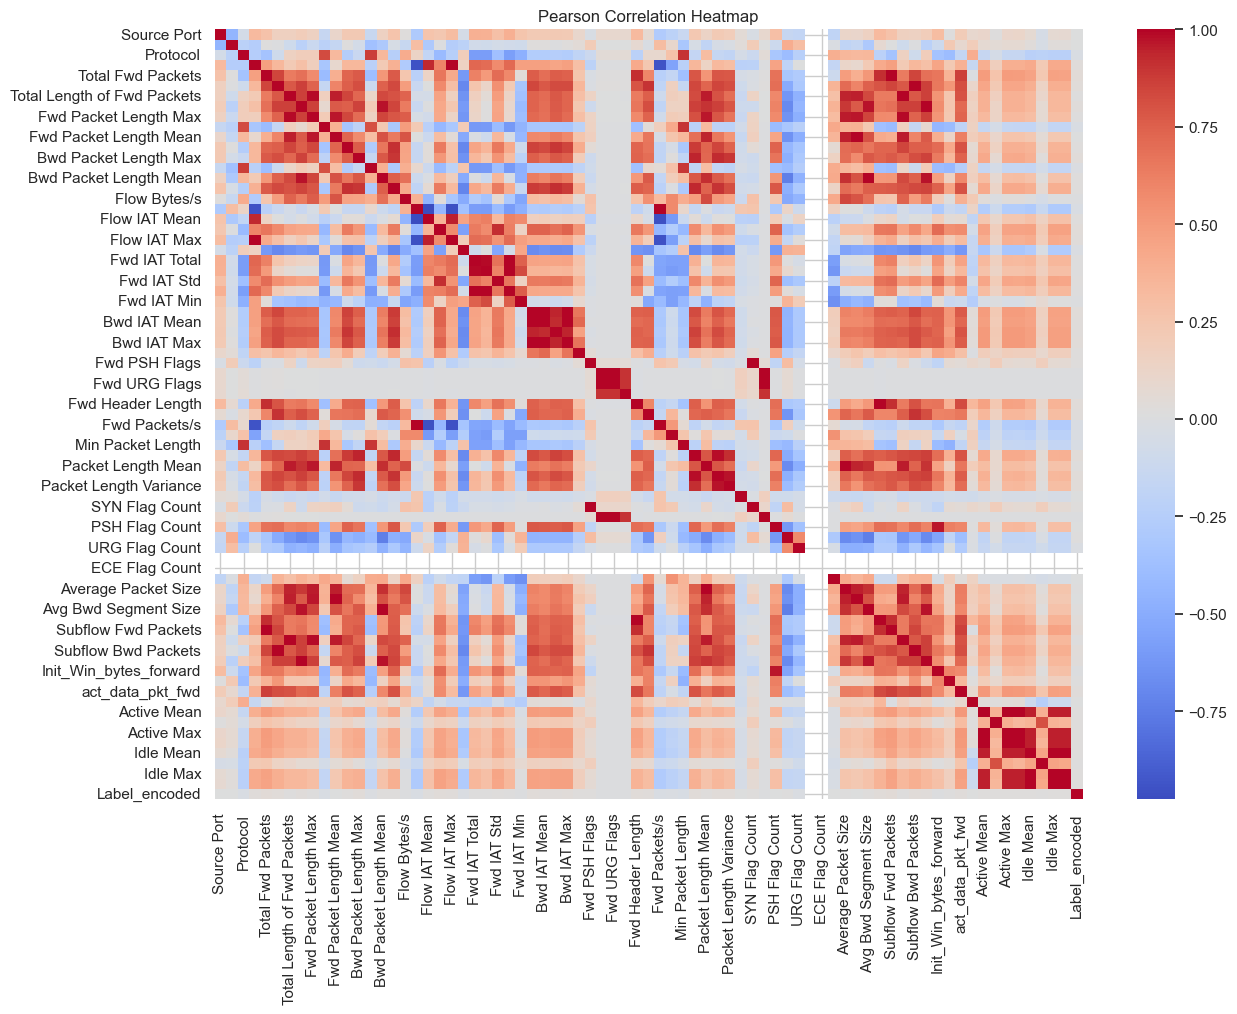

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(df_clean.corr(numeric_only=True), cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Pearson Correlation Heatmap")

# Define path and save figure for later use
figures_path = project_root / "outputs" / "eda" / "figures"
os.makedirs(figures_path, exist_ok=True)

plt.savefig(figures_path / "correlation-heatmap.png", dpi=300)
print("✅ Saved correlation heatmap to outputs/eda/figures")

# Show figure
plt.show()

* Note: PPScore would have been great to include at this point, but due to dependency conflicts with the pandas version required to run either ppscore or feature-engine, this addition was skipped in favour of keeping feature-engine fully functional.

# General Feature Engineering

In this section, 

## Drop Highly Correlated Features

* 

Drop one of each pair with correlation > 0.95

In [ ]:
correlation_matrix = df_clean.corr(numeric_only=True).abs()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.95)]
df_clean.drop(columns=high_corr_features, inplace=True)

* 

## Feature Importance

*

Check feature importance with RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X_temp = df_clean.drop('Label_encoded', axis=1)
y_temp = df_clean['Label_encoded']

rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(X_temp, y_temp)

importances = pd.Series(rf.feature_importances_, index=X_temp.columns).sort_values(ascending=False)
importances.plot(kind='barh', figsize=(10, 12), title="Feature Importances")

# Define path and save figure for later use
figures_path = project_root / "outputs" / "eda" / "figures"
os.makedirs(figures_path, exist_ok=True)

plt.savefig(figures_path / "feature-importances.png", dpi=300)
print("✅ Saved feature importances to outputs/eda/figures")

# Show figure
plt.show()

*

---

# Save Files

Save the dataset after using feature engineering to keep changes and save the created plots and figures for later use

In [ ]:
# Save Plots and Figures


---

# Train & Test Split

In this section, 

Split dataset into train and test set

In [ ]:
from sklearn.model_selection import train_test_split

X = df_clean.drop('Label_encoded', axis=1)  # or X_scaled
y = df_clean['Label_encoded']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Save train/test splits
os.makedirs("outputs/data", exist_ok=True)

X_train.to_csv(Path.cwd().parent / "outputs" / "data" / "X_train.csv", index=False)
X_test.to_csv(Path.cwd().parent / "outputs" / "data" / "X_test.csv", index=False)
y_train.to_csv(Path.cwd().parent / "outputs" / "data" / "y_train.csv", index=False)
y_test.to_csv(Path.cwd().parent / "outputs" / "data" / "y_test.csv", index=False)

print("✅ Saved split train and test set to outputs/data/")

*

# Conclusion and Next Steps

* 